In [151]:
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "99"

In [152]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3035113103773332541]

In [153]:
# Test with a simple computation
import tensorflow as tf

tf.Session()

with tf.device('/cpu:0'):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3])
# If you have gpu you can try this line to compute b with your GPU
#with tf.device('/gpu:0'):    
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2])
c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

print(sess.run(c))

# Runs the op.
# Log information
options = tf.RunOptions(output_partition_graphs=True)
metadata = tf.RunMetadata()
c_val = sess.run(c, options=options, run_metadata=metadata)

print(metadata.partition_graphs)

sess.close()

[[22. 28.]
 [49. 64.]]
[node {
  name: "MatMul_1"
  op: "Const"
  device: "/job:localhost/replica:0/task:0/device:CPU:0"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
          dim {
            size: 2
          }
          dim {
            size: 2
          }
        }
        tensor_content: "\000\000\260A\000\000\340A\000\000DB\000\000\200B"
      }
    }
  }
}
node {
  name: "_retval_MatMul_1_0_0"
  op: "_Retval"
  input: "MatMul_1"
  device: "/job:localhost/replica:0/task:0/device:CPU:0"
  attr {
    key: "T"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "index"
    value {
      i: 0
    }
  }
}
library {
}
versions {
  producer: 27
}
]


In [154]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import itertools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

tf.logging.set_verbosity(tf.logging.INFO)
sess = tf.InteractiveSession()

train = pd.read_csv('../dataProcess/rowData_train.csv',index_col = 0)
print('Shape of the train data with all features:', train.shape)
train = train.select_dtypes(exclude=['object'])
print("")
print('Shape of the train data with numerical features:', train.shape)

Shape of the train data with all features: (12189, 21)

Shape of the train data with numerical features: (12189, 21)


In [155]:
train


,posx,posy,posz,velx,vely,velz,angx,angy,angz,gyrx,...,gryz,accx,accy,accz,tposx,tposy,tposz,tvelx,tvely,tvelz
0,0.585,5.059,124.123,-70.245998,-13.861773,-61.733698,0.009041,0.024213,0.991223,-10.15,...,-0.87,0.96,-3.97,-100.78,11.998423,44.100923,20.673563,38.739516,68.089654,-135.098374
1,7.512,5.907,132.179,123.700846,15.143398,143.862281,0.018277,0.026165,0.991231,6.64,...,-0.32,-2.18,-0.78,-99.51,16.098102,45.438214,25.288722,-81.704732,50.247045,-283.765760
2,9.419,8.528,129.193,77.388199,106.363120,-121.175229,0.018277,0.026165,0.991231,6.64,...,-0.32,-2.18,-0.78,-99.51,16.389227,45.466344,25.451856,-13.294864,19.100153,-115.636583
3,7.218,10.571,128.312,-92.908400,86.238919,-37.188687,0.018277,0.026165,0.991231,6.64,...,-0.32,-2.18,-0.78,-99.51,16.680629,45.493155,25.615030,52.242361,24.584942,-145.571628
4,6.127,10.904,127.570,-23.234023,7.091594,-15.801691,0.027446,0.024506,0.991260,9.73,...,-1.26,-2.73,0.57,-103.32,17.264183,45.542801,25.941483,42.603690,50.132608,-143.529986
5,11.235,6.350,129.589,200.000000,-183.355478,81.290011,0.027446,0.024506,0.991260,9.73,...,-1.26,-2.73,0.57,-103.32,17.556294,45.565628,26.104753,-62.313899,130.220947,-190.306221
6,12.383,4.162,129.951,42.457191,-80.920152,13.388069,0.027446,0.024506,0.991260,9.73,...,-1.26,-2.73,0.57,-103.32,17.994822,45.597364,26.349700,-1.831534,98.349552,-164.409825
7,11.555,6.858,129.442,-40.034813,130.354898,-24.610773,0.027446,0.024506,0.991260,9.73,...,-1.26,-2.73,0.57,-103.32,18.287383,45.616844,26.513021,27.378266,20.703598,-151.513681
8,13.462,5.206,130.227,27.229243,-23.588206,11.208681,0.028798,0.018388,0.991303,-11.66,...,0.07,-1.02,-2.00,-97.79,18.872918,45.651766,26.839699,-13.753155,88.667402,-170.546215
9,12.418,7.659,130.054,-41.753319,98.104303,-6.918893,0.028798,0.018388,0.991303,-11.66,...,0.07,-1.02,-2.00,-97.79,19.165851,45.667199,27.003047,30.417408,23.107678,-156.873033


In [156]:
test = pd.read_csv('../dataProcess/rowData_test.csv',index_col = 0)
test = test.select_dtypes(exclude=['object'])

In [157]:
test

,posx,posy,posz,velx,vely,velz,angx,angy,angz,gyrx,...,gryz,accx,accy,accz,tposx,tposy,tposz,tvelx,tvely,tvelz
12189,48.565,50.248,117.722,12.316562,-21.128145,4.716981,0.017907,0.011391,0.991283,-4.27,...,1.73,-1.10,-1.07,-95.58,69.616695,66.346684,18.256945,27.253876,36.790961,-152.448752
12190,48.699,49.793,117.845,4.330963,-14.705882,3.975436,0.017907,0.011391,0.991283,-4.27,...,1.73,-1.10,-1.07,-95.58,69.604753,66.425760,18.517226,30.632908,34.124570,-153.885380
12191,49.345,51.424,117.832,19.328586,48.800191,-0.388965,0.015831,0.001526,0.991311,-4.65,...,0.80,-2.91,-0.72,-102.26,69.579429,66.540252,18.906633,21.698199,0.984896,-149.276728
12192,50.118,52.513,117.754,21.296526,30.002480,-2.148938,0.015831,0.001526,0.991311,-4.65,...,0.80,-2.91,-0.72,-102.26,69.545232,66.649798,19.294805,18.392790,7.502967,-147.588353
12193,50.122,51.787,118.025,0.135538,-24.600163,9.182705,0.015831,0.001526,0.991311,-4.65,...,0.80,-2.91,-0.72,-102.26,69.502184,66.754399,19.681726,29.721166,35.957832,-152.660129
12194,50.487,52.394,118.065,10.836327,18.020960,1.187543,0.011330,0.000536,0.991245,-3.43,...,1.94,-1.56,-2.81,-94.88,69.450309,66.854056,20.067378,23.519284,15.092139,-148.671480
12195,50.545,51.899,118.209,1.978914,-16.889010,4.913167,0.011330,0.000536,0.991245,-3.43,...,1.94,-1.56,-2.81,-94.88,69.410836,66.917748,20.323767,28.157263,31.959810,-151.993987
12196,50.488,51.222,118.341,-1.720859,-20.438970,3.985146,0.011330,0.000536,0.991245,-3.43,...,1.94,-1.56,-2.81,-94.88,69.344310,67.009168,20.707268,29.461521,36.312149,-149.512445
12197,50.682,51.240,118.382,5.895581,0.547013,1.245973,0.010178,0.003419,0.991241,5.95,...,-0.83,-3.45,2.35,-99.63,69.295095,67.067370,20.962207,25.574326,25.452003,-149.739994
12198,50.825,51.474,118.498,4.112977,6.730327,3.336401,0.010178,0.003419,0.991241,5.95,...,-0.83,-3.45,2.35,-99.63,69.213996,67.150558,21.343510,25.509236,22.350027,-148.553003


In [158]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(train)

IsolationForest(behaviour='old', bootstrap=False, contamination='legacy',
        max_features=1.0, max_samples=100, n_estimators=100, n_jobs=None,
        random_state=42, verbose=0)

In [159]:
clf

IsolationForest(behaviour='old', bootstrap=False, contamination='legacy',
        max_features=1.0, max_samples=100, n_estimators=100, n_jobs=None,
        random_state=42, verbose=0)

In [160]:
y_noano = clf.predict(train)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

array([    0,     2,     3, ..., 12186, 12187, 12188])

In [161]:
train = train.iloc[y_noano[y_noano['Top'] == 1].index.values]
train.reset_index(drop = True, inplace = True)

In [162]:
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", train.shape[0])

Number of Outliers: 1219
Number of rows without outliers: 10970


In [163]:
train.head(10)

,posx,posy,posz,velx,vely,velz,angx,angy,angz,gyrx,...,gryz,accx,accy,accz,tposx,tposy,tposz,tvelx,tvely,tvelz
0,0.585,5.059,124.123,-70.245998,-13.861773,-61.733698,0.009041,0.024213,0.991223,-10.15,...,-0.87,0.96,-3.97,-100.78,11.998423,44.100923,20.673563,38.739516,68.089654,-135.098374
1,9.419,8.528,129.193,77.388199,106.363120,-121.175229,0.018277,0.026165,0.991231,6.64,...,-0.32,-2.18,-0.78,-99.51,16.389227,45.466344,25.451856,-13.294864,19.100153,-115.636583
2,7.218,10.571,128.312,-92.908400,86.238919,-37.188687,0.018277,0.026165,0.991231,6.64,...,-0.32,-2.18,-0.78,-99.51,16.680629,45.493155,25.615030,52.242361,24.584942,-145.571628
3,6.127,10.904,127.570,-23.234023,7.091594,-15.801691,0.027446,0.024506,0.991260,9.73,...,-1.26,-2.73,0.57,-103.32,17.264183,45.542801,25.941483,42.603690,50.132608,-143.529986
4,13.462,5.206,130.227,27.229243,-23.588206,11.208681,0.028798,0.018388,0.991303,-11.66,...,0.07,-1.02,-2.00,-97.79,18.872918,45.651766,26.839699,-13.753155,88.667402,-170.546215
5,14.137,12.017,130.503,59.141265,149.934632,15.447602,0.028798,0.018388,0.991303,-11.66,...,0.07,-1.02,-2.00,-97.79,19.458865,45.681276,27.166396,-10.837288,-12.192723,-165.298122
6,10.633,38.788,125.070,-44.174399,-113.720338,17.283849,-0.016829,0.008087,0.991419,-5.28,...,-0.41,-1.43,-3.61,-103.01,26.749406,45.582671,31.237970,45.765904,51.904527,-151.201463
7,10.975,35.093,127.520,33.168851,31.894383,-6.895200,-0.005857,-0.008535,0.991500,18.56,...,-1.96,0.51,-1.45,-101.93,27.467826,45.524212,31.642450,14.973648,1.370094,-144.937183
8,9.366,33.294,127.013,-54.718585,-61.180071,-17.241966,-0.005857,-0.008535,0.991500,18.56,...,-1.96,0.51,-1.45,-101.93,27.897328,45.484823,31.884779,59.671713,45.533764,-138.111375
9,9.072,32.781,126.853,-11.417032,-19.921556,-6.213351,-0.005857,-0.008535,0.991500,18.56,...,-1.96,0.51,-1.45,-101.93,28.182972,45.456763,32.046173,38.698880,27.175040,-144.025807


In [164]:
import warnings
warnings.filterwarnings('ignore')

col_train = list(train.columns)
col_train_bis = list(train.columns)

#col_train_bis.remove('tposx')
col_train_bis.remove('tposy')
col_train_bis.remove('tposz')
col_train_bis.remove('tvelx')
col_train_bis.remove('tvely')
col_train_bis.remove('tvelz')

In [165]:
mat_train = np.matrix(train)
mat_test  = np.matrix(test)

In [166]:
mat_new = np.matrix(train.drop(['tposy','tposz','tvelx','tvely','tvelz'],axis = 1))
mat_y = np.array(train.tposx).reshape((10970,1))

mat_new_test = np.matrix(test.drop(['tposy','tposz','tvelx','tvely','tvelz'],axis = 1))
mat_y_test = np.array(test.tposx).reshape((1999,1))

prepro_y = MinMaxScaler()
prepro_y.fit(mat_y)

prepro = MinMaxScaler()
prepro.fit(mat_new)

prepro_test = MinMaxScaler()
prepro_test.fit(mat_new_test)



MinMaxScaler(copy=True, feature_range=(0, 1))

In [167]:
train = pd.DataFrame(prepro.transform(mat_new),columns = col_train_bis)
test  = pd.DataFrame(prepro_test.transform(mat_new_test),columns = col_train_bis)

In [168]:
train.head()

,posx,posy,posz,velx,vely,velz,angx,angy,angz,gyrx,gyry,gryz,accx,accy,accz,tposx
0,0.011264,0.002738,0.778324,0.324385,0.465346,0.411451,0.466146,0.609129,0.521850,0.521910,0.546217,0.391657,0.828749,0.202020,0.489873,0.013323
1,0.072686,0.024929,0.863044,0.693470,0.765908,0.234566,0.524431,0.617811,0.525674,0.662048,0.608062,0.455388,0.707090,0.470539,0.549694,0.042595
2,0.057383,0.037998,0.848322,0.267729,0.715597,0.484492,0.524431,0.617811,0.525674,0.662048,0.608062,0.455388,0.707090,0.470539,0.549694,0.044538
3,0.049797,0.040128,0.835923,0.441915,0.517729,0.548135,0.582287,0.610435,0.539800,0.687839,0.589732,0.346466,0.685781,0.584175,0.370231,0.048428
4,0.100797,0.003678,0.880322,0.568073,0.441029,0.628512,0.590817,0.583235,0.560524,0.509306,0.650982,0.500579,0.752034,0.367845,0.630711,0.059153


In [169]:
# List of features
COLUMNS = col_train
col_train_bis = list(train.columns)
col_train_bis.remove('tposx')
FEATURES = col_train_bis
LABEL = "tposx"

# Columns for tensorflow
feature_cols = [tf.contrib.layers.real_valued_column(k) for k in FEATURES]
# Training set and Prediction set with the features to predict
training_set = train[FEATURES]
prediction_set = train.tposx

In [170]:
# Train and Test 
x_train, x_test, y_train, y_test = train_test_split(training_set[FEATURES] , prediction_set, test_size=0.25, random_state=42)
y_train = pd.DataFrame(y_train, columns = [LABEL])
training_set = pd.DataFrame(x_train, columns = FEATURES).merge(y_train, left_index = True, right_index = True)
training_set.head()

,posx,posy,posz,velx,vely,velz,angx,angy,angz,gyrx,gyry,gryz,accx,accy,accz,tposx
1328,0.759831,0.710300,0.714892,0.497241,0.501452,0.590922,0.458346,0.512485,0.342039,0.638928,0.603517,0.366165,0.731887,0.287879,0.541686,0.573251
3060,0.533673,0.504670,0.403716,0.489781,0.593466,0.571723,0.513229,0.633157,0.554157,0.545113,0.593607,0.506373,0.658272,0.313131,0.658973,0.836276
2991,0.551473,0.297606,0.464257,0.394946,0.509745,0.592817,0.444998,0.564223,0.414389,0.732660,0.588652,0.464658,0.884541,0.436027,0.705134,0.109264
9366,0.622149,0.286143,0.958208,0.548634,0.696175,0.530543,0.485302,0.650088,0.559981,0.643853,0.598748,0.327926,0.773344,0.312290,0.380122,0.857660
6510,0.326107,0.391968,0.644058,0.546214,0.568871,0.589962,0.516515,0.519869,0.343423,0.656206,0.579151,0.179606,0.631926,0.464646,0.289684,0.389088


In [171]:
# Training for submission
training_sub = training_set[:]

In [172]:
# Same thing but for the test set
y_test = pd.DataFrame(y_test, columns = [LABEL])
testing_set = pd.DataFrame(x_test, columns = FEATURES).merge(y_test, left_index = True, right_index = True)
testing_set.head()

,posx,posy,posz,velx,vely,velz,angx,angy,angz,gyrx,gyry,gryz,accx,accy,accz,tposx
3422,0.787379,0.730400,0.387624,0.453863,0.579535,0.578609,0.560047,0.488010,0.176927,0.567899,0.557990,0.657010,0.791166,0.344276,0.656618,0.311331
4359,0.715117,0.352409,0.022191,0.432965,0.489238,0.617087,0.375796,0.509467,0.269627,0.528754,0.590962,0.425261,0.732662,0.458754,0.771550,0.543070
6866,0.501085,0.416168,0.648653,0.476363,0.471805,0.594054,0.422554,0.526301,0.336993,0.585427,0.546515,0.221321,0.769469,0.546296,0.469147,0.194757
360,0.348676,0.393548,0.772107,0.499647,0.522082,0.591463,0.448081,0.378083,0.605190,0.573157,0.621363,0.463499,0.831461,0.299663,0.398493,0.395603
8611,0.672461,0.323316,0.281448,0.554113,0.556323,0.593209,0.448329,0.679485,0.506354,0.603873,0.570508,0.390498,0.698954,0.389731,0.459256,0.958710


In [173]:
# Model
tf.logging.set_verbosity(tf.logging.ERROR)
regressor = tf.contrib.learn.DNNRegressor(feature_columns=feature_cols, activation_fn = tf.nn.relu, hidden_units=[128, 128, 128, 128],optimizer = tf.train.GradientDescentOptimizer( learning_rate= 0.0003 ))


In [174]:
# Reset the index of training
training_set.reset_index(drop = True, inplace =True)

In [175]:
def input_fn(data_set, pred = False):
    
    if pred == False:
        
        feature_cols = {k: tf.constant(data_set[k].values) for k in FEATURES}
        labels = tf.constant(data_set[LABEL].values)
        
        return feature_cols, labels

    if pred == True:
        feature_cols = {k: tf.constant(data_set[k].values) for k in FEATURES}
        
        return feature_cols

In [176]:
# Deep Neural Network Regressor with the training set which contain the data split by train test split
regressor.fit(input_fn=lambda: input_fn(training_set), steps=2000)

DNNRegressor(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._RegressionHead object at 0x7f6ab235a5f8>, 'hidden_units': [128, 128, 128, 128], 'feature_columns': (_RealValuedColumn(column_name='posx', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='posy', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='posz', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='velx', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='vely', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='velz', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='angx', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='angy', dimension=1, default_value=N

In [177]:
# Evaluation on the test set created by train_test_split
ev = regressor.evaluate(input_fn=lambda: input_fn(testing_set), steps=1)

In [178]:
# Display the score on the testing set
# 0.002X in average
loss_score1 = ev["loss"]
print("Final Loss on the testing set: {0:f}".format(loss_score1))
# Predictions
y = regressor.predict(input_fn=lambda: input_fn(testing_set))
predictions = list(itertools.islice(y, testing_set.shape[0]))

Final Loss on the testing set: 0.066871


In [179]:
predictions

[0.50436187,
 0.41522798,
 0.42063472,
 0.40955117,
 0.46409842,
 0.46975756,
 0.45974314,
 0.4232616,
 0.39468685,
 0.37460035,
 0.48830393,
 0.4920496,
 0.44441482,
 0.4942514,
 0.44718835,
 0.49030182,
 0.46397525,
 0.41317493,
 0.4660647,
 0.5141647,
 0.3973625,
 0.46259692,
 0.44301635,
 0.3792909,
 0.4502671,
 0.4759203,
 0.5009197,
 0.50800806,
 0.4810006,
 0.47063056,
 0.4593552,
 0.4716095,
 0.42674592,
 0.483083,
 0.48490545,
 0.46512136,
 0.4319813,
 0.40740392,
 0.37307683,
 0.46537146,
 0.3838682,
 0.429199,
 0.4504203,
 0.47060236,
 0.44408378,
 0.46497777,
 0.5000539,
 0.38919976,
 0.45104134,
 0.48209164,
 0.46457407,
 0.48384413,
 0.44235367,
 0.39489827,
 0.49061644,
 0.46670568,
 0.43416584,
 0.43439192,
 0.38958696,
 0.37303826,
 0.4567671,
 0.45435783,
 0.4464479,
 0.4695336,
 0.36746907,
 0.42992124,
 0.42959931,
 0.3930629,
 0.43786988,
 0.4303855,
 0.38097003,
 0.4151509,
 0.43943554,
 0.49356657,
 0.4291812,
 0.43586022,
 0.49049607,
 0.39675418,
 0.45622188,
 

In [180]:
predictions = pd.DataFrame(prepro_y.inverse_transform(np.array(predictions).reshape(2743,1)),columns = ['Prediction'])

In [181]:
reality = pd.DataFrame(prepro.inverse_transform(testing_set), columns = list(testing_set.columns)).tposx


In [182]:
predictions

,Prediction
0,85.653694
1,72.283714
2,73.094719
3,71.432198
4,79.614220
5,80.463081
6,78.960938
7,73.488747
8,69.202568
9,66.189613


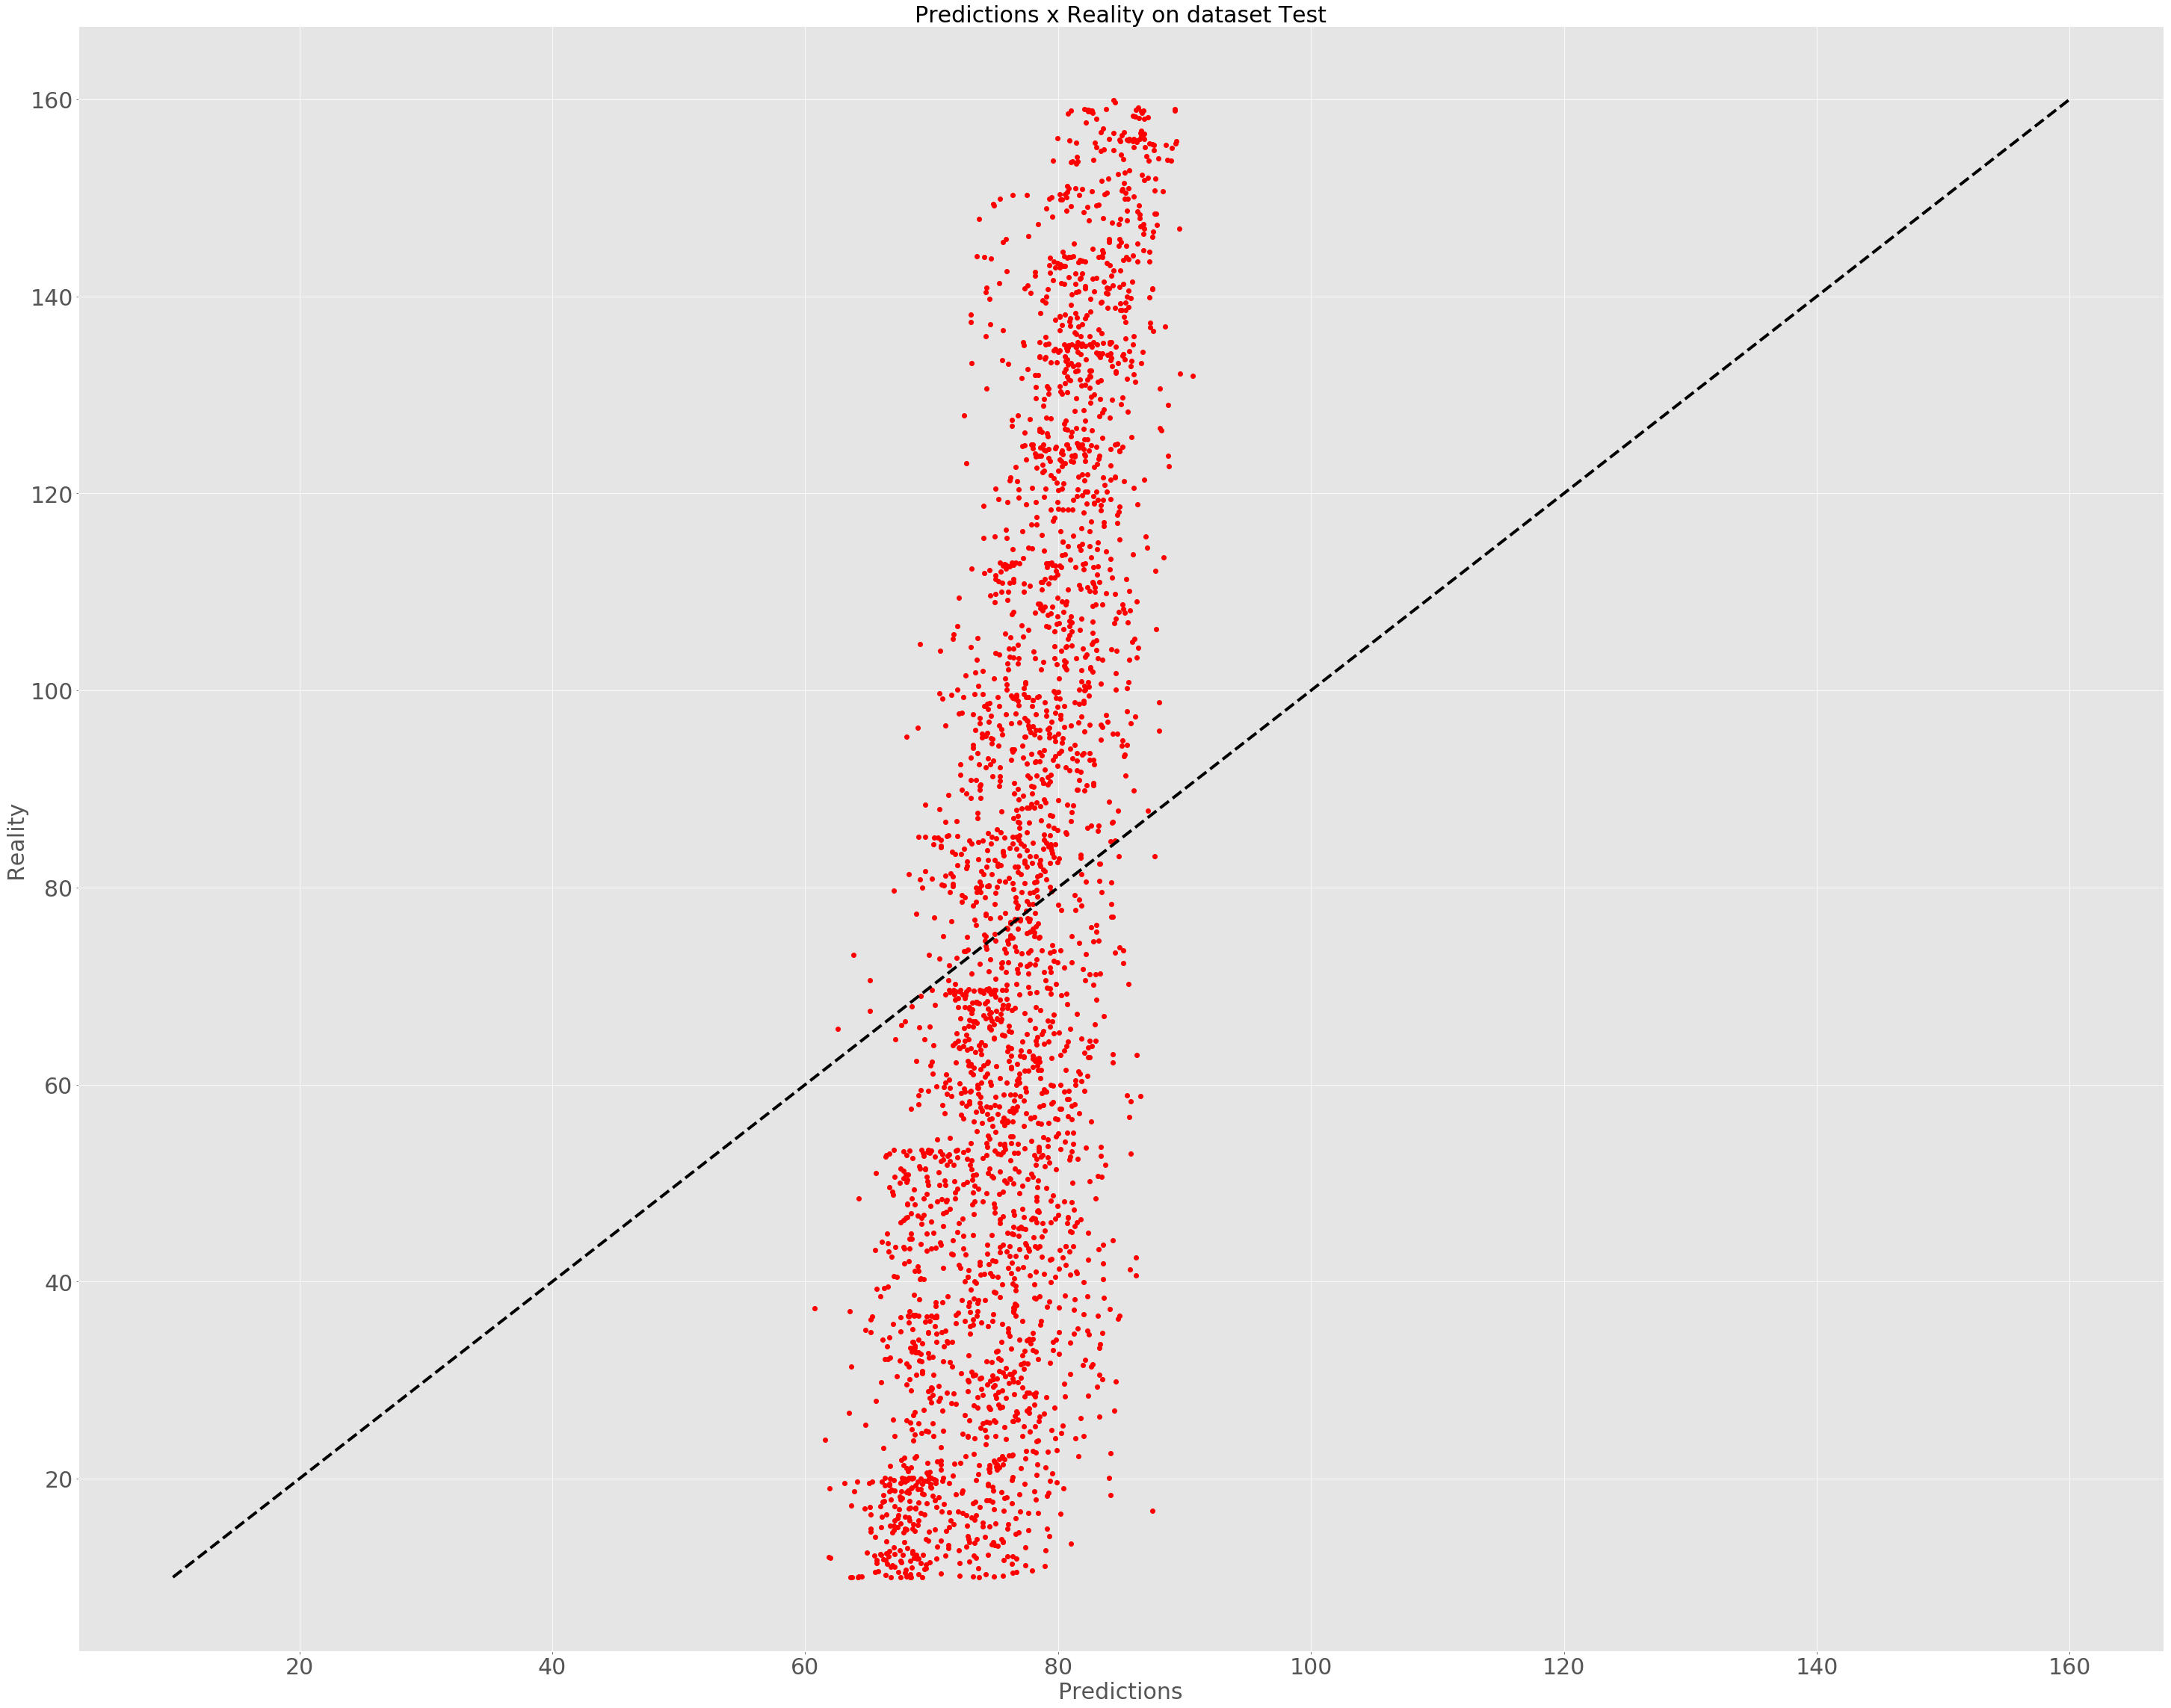

In [183]:
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

fig, ax = plt.subplots(figsize=(50, 40))

plt.style.use('ggplot')
plt.plot(predictions.values, reality.values, 'ro')
plt.xlabel('Predictions', fontsize = 30)
plt.ylabel('Reality', fontsize = 30)
plt.title('Predictions x Reality on dataset Test', fontsize = 30)
ax.plot([reality.min(), reality.max()], [reality.min(), reality.max()], 'k--', lw=4)
plt.show()